# Exercício 3 - SME0130 - Redes Complexas

### Aluno: Luciano Augusto Campagnoli da Silva
### Número USP: 9313367

Importar bibliotecas.

In [22]:
from numpy  import *
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

np.random.seed(100)

Ler grafos.

##### Hamsterster

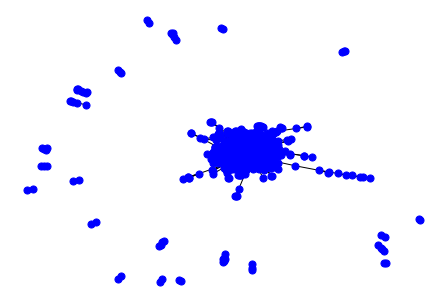

In [3]:
G= nx.read_edgelist("data/data/hamsterster.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

##### USAirport500

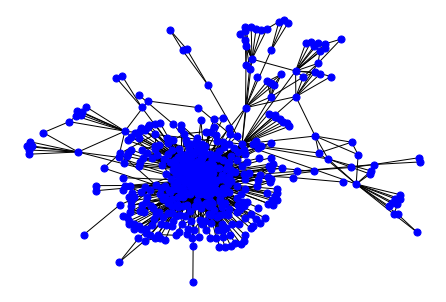

In [4]:
G3= nx.read_edgelist("data/data/USairport500.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G3= G3=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="b", node_size=50, with_labels=False)
G3 = G3.to_undirected()
G3.remove_edges_from(nx.selfloop_edges(G3))
G3cc = sorted(nx.connected_components(G3), key=len, reverse=True)
G3 = G3.subgraph(G3cc[0])
G3 = nx.convert_node_labels_to_integers(G3, first_label=0)

##### Jazz

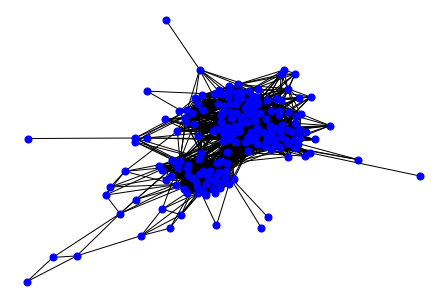

In [5]:
G4= nx.read_edgelist("data/data/jazz.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G4= G4=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G4)
nx.draw(G4, pos, node_color="b", node_size=50, with_labels=False)
G4 = G4.to_undirected()
G4.remove_edges_from(nx.selfloop_edges(G4))
G4cc = sorted(nx.connected_components(G4), key=len, reverse=True)
G4 = G4.subgraph(G4cc[0])
G4 = nx.convert_node_labels_to_integers(G4, first_label=0)

## Questão 1

Centralidade de autovetor.

In [9]:
EC = dict(nx.eigenvector_centrality(G3, max_iter = 1000))
print('Eigenvetor centrality:', EC)

Eigenvetor centrality: {0: 0.190768011660013, 1: 0.03636566857696693, 2: 0.06916266029219698, 3: 0.00396810728416781, 4: 0.008793199264018947, 5: 0.07118060019092094, 6: 0.04546430744771249, 7: 0.07323642015910913, 8: 0.017304434247065632, 9: 0.01792273274564297, 10: 0.0897698767865775, 11: 0.07380066147981255, 12: 0.021849589268772313, 13: 0.12467071731482442, 14: 0.1314365087782581, 15: 0.00396810728416781, 16: 0.023602572915143557, 17: 0.07362620372650142, 18: 0.13953024621380897, 19: 0.04641141422804448, 20: 0.024485774380543175, 21: 0.017437538950638515, 22: 0.023298102859370257, 23: 0.04561503424842584, 24: 0.138026289259675, 25: 0.14913393470874764, 26: 0.09676493405122429, 27: 0.04602572559691255, 28: 0.012354640796703597, 29: 0.03949654624376501, 30: 0.007070203451269213, 31: 0.17727093382439216, 32: 0.016769651517526678, 33: 0.020450615709312288, 34: 0.06667976179297111, 35: 0.13071989875141388, 36: 0.15277202028115425, 37: 0.1782209631748552, 38: 0.00396810728416781, 39: 0.0

Centralidade de autovetor média.

In [10]:
EC = list(EC.values())
av_EC = np.mean(EC)
print('Average eigenvector centrality', av_EC)

Average eigenvector centrality 0.022754398239423695


Alternativa correta: **a**.

## Questão 2

Cálculo da centralidade intersticial.

In [12]:
# Betweenness centrality
B = dict(nx.betweenness_centrality(G))
print('Betweeness centrality:', B)
B = list(B.values())

Betweeness centrality: {0: 0.0032301395159124173, 1: 0.004359163634432046, 2: 4.69760984669588e-06, 3: 0.0019246756055983022, 4: 0.0015897108730727908, 5: 0.008317832920302798, 6: 0.00042458389219936216, 7: 1.9738944899129653e-05, 8: 0.023830285305123603, 9: 0.011152942491924013, 10: 0.004368348881463037, 11: 0.0034727280151145012, 12: 0.005163274835100675, 13: 0.00411887790194941, 14: 0.02975972399325523, 15: 0.05758339013331758, 16: 0.0002996185250389925, 17: 0.0009208796235972814, 18: 0.01340604707192026, 19: 0.0, 20: 0.004584667123603669, 21: 0.005518916467675661, 22: 0.00024335317825260338, 23: 7.846059838832014e-06, 24: 0.009177311193294593, 25: 0.0015066002983463687, 26: 0.0015066002983463687, 27: 0.0035460458888329164, 28: 0.008128163481218163, 29: 0.01456782086301145, 30: 0.01794811494908073, 31: 0.03539561691905463, 32: 0.0018450219333241019, 33: 0.006158468825870166, 34: 0.0010998920747460827, 35: 0.01315125260071138, 36: 0.010443397043085126, 37: 0.0061497432766047895, 38: 

Grau dos vértices.

In [13]:
vk = dict(G.degree())
vk = list(vk.values())
print("Degree centrality", vk)

Degree centrality [27, 45, 3, 17, 12, 36, 11, 4, 97, 68, 32, 30, 32, 30, 74, 147, 10, 16, 83, 1, 15, 29, 6, 2, 101, 31, 31, 34, 119, 137, 142, 169, 34, 48, 8, 55, 50, 31, 27, 98, 42, 8, 21, 12, 32, 60, 11, 15, 27, 21, 84, 98, 74, 9, 25, 14, 119, 108, 124, 126, 51, 5, 62, 19, 12, 12, 14, 12, 16, 16, 43, 11, 38, 37, 41, 46, 67, 72, 77, 71, 72, 90, 35, 86, 113, 72, 62, 90, 59, 87, 222, 272, 79, 154, 64, 33, 34, 41, 41, 45, 105, 52, 9, 9, 11, 53, 68, 36, 56, 90, 27, 8, 39, 11, 43, 5, 11, 20, 76, 16, 12, 12, 29, 36, 43, 22, 73, 49, 48, 51, 51, 22, 148, 72, 74, 31, 48, 9, 10, 16, 19, 4, 4, 66, 30, 33, 4, 98, 82, 78, 10, 16, 14, 23, 3, 13, 11, 24, 30, 97, 35, 98, 2, 12, 5, 25, 4, 10, 61, 2, 3, 62, 62, 1, 7, 10, 10, 10, 10, 10, 10, 17, 10, 10, 6, 12, 2, 4, 2, 1, 46, 23, 2, 31, 12, 8, 47, 12, 5, 8, 7, 89, 14, 69, 62, 69, 5, 1, 3, 2, 3, 25, 3, 1, 2, 8, 2, 9, 22, 2, 27, 3, 24, 25, 14, 77, 17, 13, 28, 22, 85, 18, 12, 23, 9, 12, 15, 31, 50, 59, 4, 4, 4, 23, 37, 21, 88, 43, 3, 23, 84, 24, 39, 35, 40

Correlação de Pearson entre centralidade intersticial e grau.

In [23]:
# calculate Pearson's correlation
corr, _ = stats.pearsonr(B, vk)
print("Pearson correlation: ", corr)

Pearson correlation:  0.8242435188731521


Alternativa correta: **d**.

## Questão 3

Cálculo da centralidade *k-core*.

In [24]:
KC= dict(nx.core_number(G4))
KC = list(KC.values())
print('k-core:', KC)

k-core: [18, 18, 18, 29, 11, 18, 29, 18, 18, 21, 21, 29, 29, 29, 29, 18, 15, 29, 29, 29, 29, 10, 29, 21, 3, 20, 21, 21, 4, 4, 17, 17, 17, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 20, 1, 13, 17, 17, 15, 21, 21, 17, 15, 15, 15, 17, 17, 17, 15, 15, 15, 17, 21, 17, 15, 17, 16, 11, 17, 21, 21, 21, 2, 2, 2, 21, 20, 16, 21, 21, 20, 21, 21, 21, 21, 21, 20, 9, 21, 19, 21, 21, 21, 20, 13, 21, 29, 21, 21, 20, 21, 20, 21, 20, 21, 20, 21, 21, 19, 21, 14, 21, 21, 21, 21, 17, 29, 21, 21, 21, 21, 15, 13, 29, 15, 15, 14, 12, 29, 13, 15, 15, 29, 20, 20, 20, 4, 4, 4, 13, 8, 8, 8, 15, 29, 29, 2, 29, 20, 17, 21, 17, 11, 19, 21, 21, 14, 1, 3, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 8, 11, 14, 14, 15, 4, 4, 3, 6, 6, 7, 7, 11, 8, 15, 3, 6, 10, 12, 17, 1, 2, 1, 1]


Cálculo da centralidade de proximidade.

In [25]:
CLC = dict(nx.closeness_centrality(G4))
CLC = list(CLC.values())
print('Closeness centrality', CLC)

Closeness centrality [0.42919389978213507, 0.4613583138173302, 0.48402948402948404, 0.4613583138173302, 0.44269662921348313, 0.4310722100656455, 0.5898203592814372, 0.42919389978213507, 0.48284313725490197, 0.49873417721518987, 0.5038363171355499, 0.5116883116883116, 0.5367847411444142, 0.5157068062827225, 0.5157068062827225, 0.4457013574660634, 0.4129979035639413, 0.5324324324324324, 0.5253333333333333, 0.5549295774647888, 0.4613583138173302, 0.4121338912133891, 0.5811209439528023, 0.5077319587628866, 0.3588342440801457, 0.4746987951807229, 0.5225464190981433, 0.5184210526315789, 0.3724007561436673, 0.37595419847328243, 0.5225464190981433, 0.5116883116883116, 0.49747474747474746, 0.3971774193548387, 0.5090439276485789, 0.4164904862579281, 0.4497716894977169, 0.4613583138173302, 0.40286298568507156, 0.38703339882121807, 0.4528735632183908, 0.49373433583959897, 0.4053497942386831, 0.40702479338842973, 0.4078674948240166, 0.43973214285714285, 0.47815533980582525, 0.4876237623762376, 0.33

Correlação de Spearman entre centralidades *k-core* e de proximidade.

In [26]:
s = stats.spearmanr(KC, CLC)
print('Spearman rank correlation coefficient:', s)

Spearman rank correlation coefficient: SpearmanrResult(correlation=0.7353399833516917, pvalue=5.889403279320736e-35)


Alternativa correta: **b**.